In [99]:
import osmnx as ox
import networkx as nx
import pandas as pd

# Step 1: Create a Street Network Graph
place_name = "Lustenau, Vorarlberg, Austria"
G = ox.graph_from_place(place_name, network_type='drive', simplify=True)
G_proj = G.to_undirected()
ox.basic_stats(G_proj)
# 
# CUSTOM_FILTER = (
#     '["highway"]["area"!~"yes"]["highway"!~"bridleway|bus_guideway|bus_stop|construction|cycleway|elevator|footway|'
#     'motorway|motorway_junction|motorway_link|escalator|proposed|construction|platform|raceway|rest_area|'
#     'path|service"]["access"!~"customers|no|private"]["public_transport"!~"platform"]'
#     '["fee"!~"yes"]["foot"!~"no"]["service"!~"drive-through|driveway|parking_aisle"]["toll"!~"yes"]'
# )
# location = "Lustenau, Vorarlberg, Austria"
# G = ox.graph_from_place(location, custom_filter=CUSTOM_FILTER)

{'n': 687,
 'm': 877,
 'k_avg': 2.5531295487627363,
 'edge_length_total': 113441.661,
 'edge_length_avg': 129.35195096921322,
 'streets_per_node_avg': 2.5705967976710333,
 'streets_per_node_counts': {0: 0, 1: 165, 2: 3, 3: 481, 4: 38},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.24017467248908297,
  2: 0.004366812227074236,
  3: 0.7001455604075691,
  4: 0.055312954876273655},
 'intersection_count': 522,
 'street_length_total': 113178.752,
 'street_segment_count': 876,
 'street_length_avg': 129.1994885844749,
 'circuity_avg': 1.0429455363347429,
 'self_loop_proportion': 0.001141552511415525}

In [100]:
nx.is_eulerian(G_proj)

False

In [101]:
nx.has_eulerian_path(G_proj)

False

In [88]:
G = G.to_undirected()

In [89]:
lustenau_nodes_df, lustenau_edges_df = ox.graph_to_gdfs(G_proj)
G_proj.degree
G_proj.nodes[323329860]

{'y': 5254995.919434963,
 'x': 552529.2694538808,
 'street_count': 3,
 'lon': 9.6967666,
 'lat': 47.4462899}

In [90]:
nx.is_eulerian(G)

False

In [91]:
nx.has_eulerian_path(G)

False

In [102]:
import numpy as np

lustenau_nodes_df, lustenau_edges_df = ox.graph_to_gdfs(G_proj)
streets_unsorted = lustenau_edges_df[lustenau_edges_df['name'].notnull()]['name'].explode().unique()
streets_sorted = np.sort(streets_unsorted)
streets_sorted

array(['Alberriedstraße', 'Alpstraße', 'Am Böhler', 'Am Kanal',
       'Am Moosbach', 'Am Neuner', 'Am Schlatt', 'Amann Fitz Straße',
       'Andreas-Hofer-Straße', 'Anhängestraße', 'Augartenstraße',
       'Augasse', 'Badlochstraße', 'Bahngasse', 'Bahnhofstraße',
       'Beethovenweg', 'Beno-Vetter-Weg', 'Bettleweg', 'Bildgasse',
       'Binsenfeldstraße', 'Birkenweg', 'Blumenaustraße',
       'Brugger Straße', 'Bruggerwiesen', 'Brunnenau', 'Brändlestraße',
       'Bündtenstraße', 'Büngenstraße', 'Dammstraße', 'Dornbirner Straße',
       'Dr.-Baldauf-Straße', 'Eigenheimstraße', 'Elisabethstraße', 'Enga',
       'Engel Kreisverkehr', 'Erlengasse', 'Felbenweg', 'Felderstraße',
       'Feldgasse', 'Feldkreuzstraße', 'Finkenweg', 'Fischerbühel',
       'Flurstraße', 'Forststraße', 'Friedensstraße', 'Frühlingsstraße',
       'Frühmessau', 'Fuchsfeld', 'Gartenweg', 'Glaserweg',
       'Goethestraße', 'Grafenweg', 'Grindelstraße', 'Grundwies',
       'Grüttstraße', 'Gutenbergstraße', 'Gänsle

In [103]:
lustenau_edges_df[lustenau_edges_df['name'] == 'Quellenstraße']

,,,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,bridge,geometry,junction,width,tunnel
u,v,key,,,,,,,,,,,,,,
323293851,323322071,0,29392482,False,NaN,NaN,Quellenstraße,residential,40,False,88.384,NaN,"LINESTRING (9.65056 47.43407, 9.65084 47.43399...",NaN,NaN,NaN
323315860,323326743,0,1215843804,False,NaN,NaN,Quellenstraße,residential,40,True,114.758,NaN,"LINESTRING (9.64777 47.43483, 9.64918 47.43444)",NaN,NaN,NaN
323322065,323322071,0,29392481,False,NaN,NaN,Quellenstraße,residential,40,True,184.664,NaN,"LINESTRING (9.65056 47.43407, 9.65031 47.43380...",NaN,NaN,NaN
323322071,323326743,0,29392482,False,NaN,NaN,Quellenstraße,residential,40,False,111.983,NaN,"LINESTRING (9.64918 47.43444, 9.65023 47.43416...",NaN,NaN,NaN


In [74]:
%%capture
import matplotlib.pyplot as plt

# Load your GeoDataFrame (replace 'your_geodataframe' with the actual name of your GeoDataFrame)
gdf = lustenau_edges_df

for street in streets_sorted:
    # Filter the GeoDataFrame to select only the 'Augarten' street
    augarten_street = gdf[gdf['name'] == street]  # Replace 'street_name' with the actual column name
    
    # Plot the whole map with invisible lines
    ax = gdf.plot(color='none', edgecolor='none', figsize=(10, 10))  # Adjust figsize as needed
    
    # Plot only the 'Augarten' street on top of the map
    augarten_street.plot(ax=ax, color='blue', linewidth=2)  # Choose your color and line width
    
    # Set the bounds to the whole GeoDataFrame
    bounds = gdf.total_bounds
    ax.set_xlim(bounds[0], bounds[2])
    ax.set_ylim(bounds[1], bounds[3])
    
    # Add additional plot settings as needed
    plt.title(f'Map with {street} Highlighted')
    plt.savefig(f'streets/{street}_street_map.png', dpi=300, transparent=True)  # Adjust the file name and dpi as needed

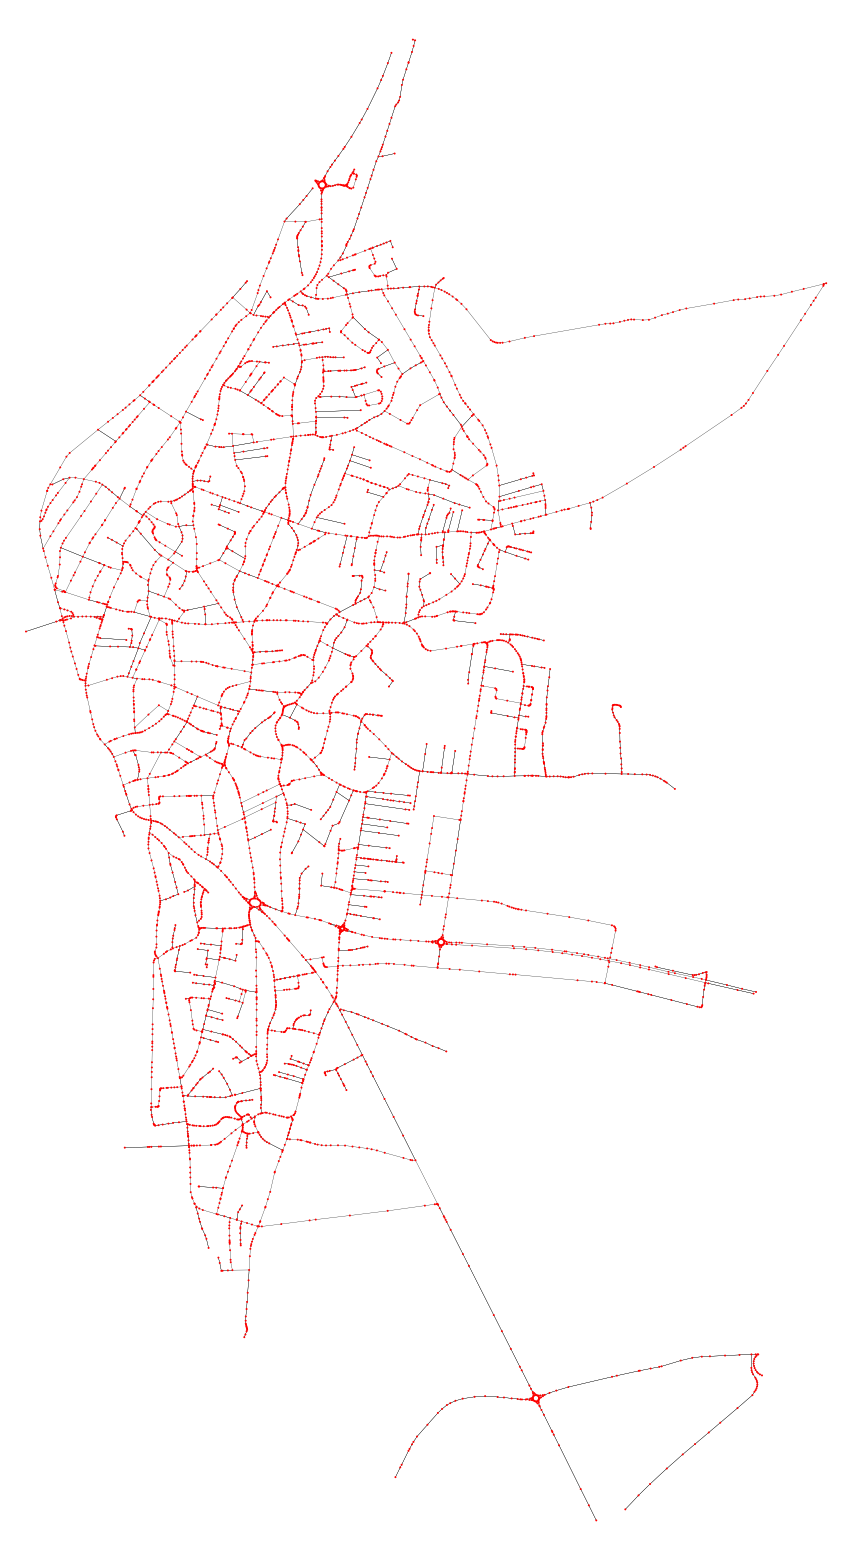

In [148]:
import osmnx as ox
fig, ax = ox.plot_graph(G, bgcolor='#00000000', edge_color='k', node_color='r', node_size=2, edge_linewidth=0.2, edge_alpha=1, figsize=(20,20), dpi=300, save=True, filepath='eulerian_lustenau.png')

In [95]:
def f(frame):
    xy = frame.geometry.xy
    longs = xy[0].tolist()
    lats = xy[1].tolist()
    return [list(z) for z in zip(lats, longs)]

lustenau_edges_df['coords'] = lustenau_edges_df.apply(f, axis=1)
lustenau_edges_df['coords']

u           v           key
2113259     323329860   0      [[5254995.919434963, 552529.2694538808], [5254...
            915529984   0      [[5255008.554106808, 550689.2086502882], [5255...
            455599478   0      [[5254966.488832387, 550571.0504840934], [5254...
            323321791   0      [[5254351.850811918, 550840.0674201098], [5254...
323329860   323325543   0      [[5253928.893620263, 551407.0620935606], [5253...
                                                     ...                        
2859477962  4518848764  0      [[5249586.2728020465, 551183.1792596753], [524...
3068640592  6565095752  0      [[5255511.452554187, 550242.4285021503], [5255...
6565095752  6565095762  0      [[5255439.333778557, 550228.3607155316], [5255...
4376974014  1505631528  0      [[5249822.480000463, 552225.6507822842], [5249...
            4376974015  0      [[5249822.745116008, 552255.4559825334], [5249...
Name: coords, Length: 877, dtype: object

In [96]:
coords_x = []
coords_y = []

for temp_coord in lustenau_edges_df['coords']:
    for coord in temp_coord:
        coords_x.append(coord[0])
        coords_y.append(coord[1])
        
coords_x

[5254995.919434963,
 5254971.372855838,
 5254957.171382134,
 5254942.846949957,
 5254936.785850023,
 5254933.648343932,
 5254932.2530021835,
 5254929.9079654375,
 5254923.096164871,
 5254919.290145075,
 5254917.204410978,
 5254914.061852869,
 5254896.128421974,
 5254871.664087307,
 5254863.733988032,
 5254853.524078377,
 5254846.022115405,
 5254838.4245045865,
 5254825.997776959,
 5254815.297971178,
 5254813.926942245,
 5254815.764561753,
 5254816.45661107,
 5254813.89511613,
 5254809.917325889,
 5254804.28150395,
 5254796.949066521,
 5254795.602743859,
 5254794.385419615,
 5254789.316660482,
 5254731.704681601,
 5254723.013231536,
 5254704.751506742,
 5254698.425487714,
 5254697.600686561,
 5254697.731533672,
 5254698.754424838,
 5254701.294103716,
 5254704.744179489,
 5254710.865404336,
 5254858.465452656,
 5254884.525402552,
 5254902.1212605,
 5254906.134663722,
 5254919.474567677,
 5254930.356599811,
 5254936.785258032,
 5254942.968789379,
 5254950.192616539,
 5254955.71272658,
 52